In [2]:
%run functions.ipynb
# import b2plot as b2 -Was pretty lame plugin
df_chg = pd.read_pickle('DlKKs_chgMC_df.p ')
df_mix = pd.read_pickle('DlKKs_mixMC_df.p')
df_cc = pd.read_pickle('DlKKs_ccMC_df.p')
df_uds = pd.read_pickle('DlKKs_udsMC_df.p')
df_off = pd.read_pickle('DlKKs_off_df.p')
df_dat = pd.read_pickle('DlKKs_data_df.p')
df_cmc = pd.read_pickle('DlKKs_allsim_df.p')

#---------------------------------- Data lumi = 365.290, BB cross-section = 1050000.0, Offpeak lumi = 42.740 #144643/577965 = 0.2502625591515057
df_cc2 = pd.read_pickle('old/DlKKs_ccMC_df.p')
df_chg2 = pd.read_pickle('old/DlKKs_chgMC_df.p')
df_mix2 = pd.read_pickle('old/DlKKs_mixMC_df.p')
df_dat2 = pd.read_pickle('old/DlKKs_data_df.p')
#--------------------------------- Generic MC lumi = 1461.16, wtMC = 0.250, wtMCOff = 0.029
datasmc = [df_chg,df_mix,df_cc,df_uds]
df_names = [r"$B^+B^-$", r"$B^0\bar{B}^0$", r"$c\bar{c}$", r"light $q\bar{q}$ ($u,d,s$)", r"off-resonance"]
df_namesmc = [r"$B^+B^-$", r"$B^0\bar{B}^0$", r"$c\bar{c}$", r"light $q\bar{q}$ ($u,d,s$)"]
datasmc_old = [df_chg2,df_mix2,df_cc2] #3.99 more data 
api = pdg.connect()
df_asim = df_cmc.copy() #(577965, 328) r x c initial
labbin = ['Signal','Background']
mc_weights1 = np.ndarray((577965,))
mc_weights1.fill(0.25)
mc_weights2 = np.ndarray((577965,))
mc_weights2.fill(0.002737551)
dat_weights1 = np.ndarray((144643,))
dat_weights1.fill(0.002737551)
sig_vars = ['nROE_Ch', 'nROE_ECL', 'nROE_KL', 'Q_ROE', 'M_ROE', 'Eextra_ROE', 'R2', 'cosTBTO',
     'nROE_ECL_loose', 'M_ROE_loose', 'Eextra_ROE_loose',
     'trkK0S_ECM', 'trkK0S_pCM', 'trkK0S_InvM', 'trkK0S_cosThCM', 'trkK0S_phiCM', 'trkK0S_charge',
     'trkK0S_isSignal', 'trkK0S_isSignalAcceptMissing',
     'trk_ECM', 'trk_pCM', 'trk_InvM', 'trk_cosThCM', 'trk_phiCM', 'trk_charge',
     'trk_isSignal', 'trk_isSignalAcceptMissing', 'trk_dr', 'trk_d0Err', 'trk_dz',
     'trk_nCDCHits', 'trk_nVXDHits', 'trk_ndf', 'trk_chi2', 'trk_lastCDCLayer',
     'K0S_ECM', 'K0S_pCM', 'K0S_InvM', 'K0S_cosThCM', 'K0S_phiCM', 'K0S_charge',
     'K0S_isSignal', 'K0S_isSignalAcceptMissing', 'K0S_chiProb', 'K0S_flightDistance',
     'K0S_flightDistanceErr', 'K0S_dr', 'K0S_dz',
     'nISR', 'cosK0Strk']

tag = ['BSL_ECM', 'BSL_pCM', 'BSL_InvM', 'BSL_cosThCM', 'BSL_phiCM', 'BSL_charge',
     'BSL_BchiProb', 'BSL_BflightDistance', 'BSL_BflightDistanceErr', 'BSL_Bdr', 'BSL_Bdz',
     'BSL_isSignal', 'BSL_isSignalAcceptMissing', 'BSL_cosBY',
     'eSL_ECM', 'eSL_pCM', 'eSL_InvM', 'eSL_cosThCM', 'eSL_phiCM', 'eSL_charge',
     'eSL_isSignal', 'eSL_isSignalAcceptMissing',
     'D0SL_ECM', 'D0SL_pCM', 'D0SL_InvM', 'D0SL_cosThCM', 'D0SL_phiCM', 'D0SL_charge',
     'D0SL_DchiProb', 'D0SL_DflightDistance', 'D0SL_DflightDistanceErr',
     'D0SL_Ddr', 'D0SL_Ddz', 'D0SL_isSignal', 'D0SL_isSignalAcceptMissing',
     'cosK0SeSL', 'cosK0SD0SL']

df_asim = set_modes_sig(df_asim)
"""Alternative Implementation for function"""
    # bplus_dict = {}
    # bminus_dict = {}
    # b0_dict = {}
    # bbar0_dict = {}
    # bs0_dict = {}
    # bsbar0_dict = {}
    # d0_dict = {}
    # dbar0_dict = {}
    # dminus_dict = {}
    # dplus_dict = {}
    # dsminus_dict = {}
    # dsplus_dict = {}
    # dstminus_dict = {}
    # dstplus_dict = {}
    # tplus_dict = {}
    # tminus_dict = {}
    
    # dec_tag_dicts = [
    # bplus_dict,bminus_dict,
    # b0_dict,bbar0_dict,
    # bs0_dict,bsbar0_dict,
    # dstplus_dict,dstminus_dict,
    # dsplus_dict,dsminus_dict,
    # dplus_dict,dminus_dict,
    # d0_dict,dbar0_dict,
    # tplus_dict,tminus_dict]
    # parents = [
    #     r'B^{+}\rightarrow',r'B^{-}\rightarrow',
    #     r'B^{0}\rightarrow',r'\bar{B}^{0}\rightarrow',
    #     r'B^{0}_{s}\rightarrow',r'\bar{B}^{0}_{s}\rightarrow',
    #     r'D^{*+}\rightarrow',r'D^{*-}\rightarrow',
    #     r'D^{+}_{s}\rightarrow',r'D^{-}_{s}\rightarrow',
    #     r'D^{+}\rightarrow',r'D^{-}\rightarrow',
    #     r'D^{0}\rightarrow',r'\bar{D}^{0}\rightarrow',
    #     r'\tau^{+}\rightarrow',r'\tau^{-}\rightarrow'
    # ]

    # dec_tag_files = [
    #     'BplusTag.tex','BminusTag.tex',
    #     'B0Tag.tex','Bbar0Tag.tex',
    #     'Bs0Tag.tex','Bsbar0Tag.tex',
    #     'DstplusTag.tex','DstminusTag.tex',
    #     'DsplusTag.tex','DsminusTag.tex',
    #     'DplusTag.tex','DminusTag.tex',
    #     'D0Tag.tex','Dbar0Tag.tex',
    # 'TauplusTag.tex','TauminusTag.tex']
    # decay_ids = 'all_decays.csv'
    # unidentified = [*range(1,31,), 99]
    # for fi, di, tag in zip(dec_tag_files, dec_tag_dicts, parents):
    #     with open(filepath+fi, encoding='utf-8') as fh:
    #         for line in fh:
    #             if "$" in line:
    #                 decay = line.split("$ ")[1]
    #                 mode, modeid = decay.split("\\hfill")
    #                 mode, modeid = mode.strip(), modeid.strip("{}$ \n")[1:]
    #                 #di[int(modeid)] = f"{tag} {mode}"

    #                 with open("all_decays.csv", "a") as f: #This exploits that all decay modes for each parent start at 1001 to sep each file
    #                     if int(modeid) == 1001:
    #                         type_dec = fi.split('Tag')[0]
    #                         f.write(type_dec+',Decay ID\n')# Vertically seperated order
    #                         for num in unidentified: #Put unknown daughter modes upto 100 + not found mode for each
    #                             if num != 99:
    #                                 line = f'{tag} {num} \\: Daughters'
    #                                 f.write(line+','+str(num)+'\n')
    #                                 di[int(num)] = line
    #                             else:
    #                                 line = f'-99:\\:Particle\\:Not\\:Found'
    #                                 f.write(line+','+str(num)+'\n')
    #                                 di[int(num)] = line
    #                     #For FSR inclusion its N00000 + ModeID, so "in method" is best
    #                     f.write(tag + ' ' + mode + ',' + modeid+'\n')
    #                 di[int(modeid)] = f"{tag} {mode}"
    
    # return dec_tag_dicts

'Alternative Implementation for function'

In [3]:
def get_mode_dicts(filepath = ''): # Ordered keys as: Bplus, Bminus, B0, Bbar0, Bs0, Bsbar0, Dstplus, Dstminus, Dsplus, Dsminus, Dplus, Dminus, D0, Dbar0, Tauplus, Tauminus

    #https://docs.belle2.org/files/541/BELLE2-NOTE-TE-2021-002/1/BELLE2-NOTE-TE-2021-002.pdf referenced from MC gen tag tool in BASF2, tex files from MC gen Tag tool
    #basf2/analysis/utility/src/GenBsTag.cc
    """Note: This is one way to scan and get the corresponding decay files from the published tool relating to the internal note on gitlab. 
    However, one could in theory do the same thing on the files in BASF2. 

    To do this, goto Basf2 in gitlab. Then analysis/utility/. The tool GENMCTAG is mostly in the src files as GenBplusTag.cc
    Going through each raw file with a scan or by calling the methods and getting the corresponding decay and string is another way. 
    Will implement if time, along with a reverse look up. Ie, input decay string, get ID.
    if (GenBsTag::PcheckDecay(genpart, -10431, -15, 16)) {
    return +1 * (100000 * m_nPhotos + 1016); is how its done in the basf2 implementation. 
    So, going through the list iteratively as how they've designed it with a PDG hash table of the particles would be 
    rather simple for a next and more robust iteration. Specifically incase the tool is updated in basf2 only but not in the publication files on gitlab. 
    
    For now, I've attached a simple method to demonstrate using this function to show decay strings
    Originally this was done using a bunch of dictionaries but I swapped to a nested version where you can specify the mother rather than the index.
    I also included the mother and an arrow in the decay string, but left in the commented version without that which is more concise and implies the mother 
    in the correct context.
    # update: I made it more concise and read through a CSV I generated with the old method - Downside is would need updated with some changes if more added. 
    """
    
    master_dict = {
    'Bplus': {},'Bminus': {},
    'B0': {},'Bbar0': {},
    'Bs0': {},'Bsbar0': {},
    'Dstplus': {},'Dstminus': {},
    'Dsplus': {},'Dsminus': {},
    'Dplus': {},'Dminus': {},
    'D0': {},'Dbar0': {},
    'Tauplus': {},'Tauminus': {}}
    with open(filepath+'all_decays.csv',encoding='utf-8') as fh:
            for line in fh:
                line = line.strip()
                if 'Decay ID' in line:
                    key = line.split(',')[0]
                    continue
                mode, modeid = line.split(',')
                master_dict[key][int(modeid)] = mode


    return master_dict

In [4]:
# x = get_mode_dicts()
# i = 0
# for key, modes in x.items():
#     for mode in modes.values():
#         i += 1
#         display(Math(mode))
#         if i == 31 :
#             break
#     if i > 50:
#        break
#
# y = x['Bplus'][1001]
# label = f"${y}$"
# label, y

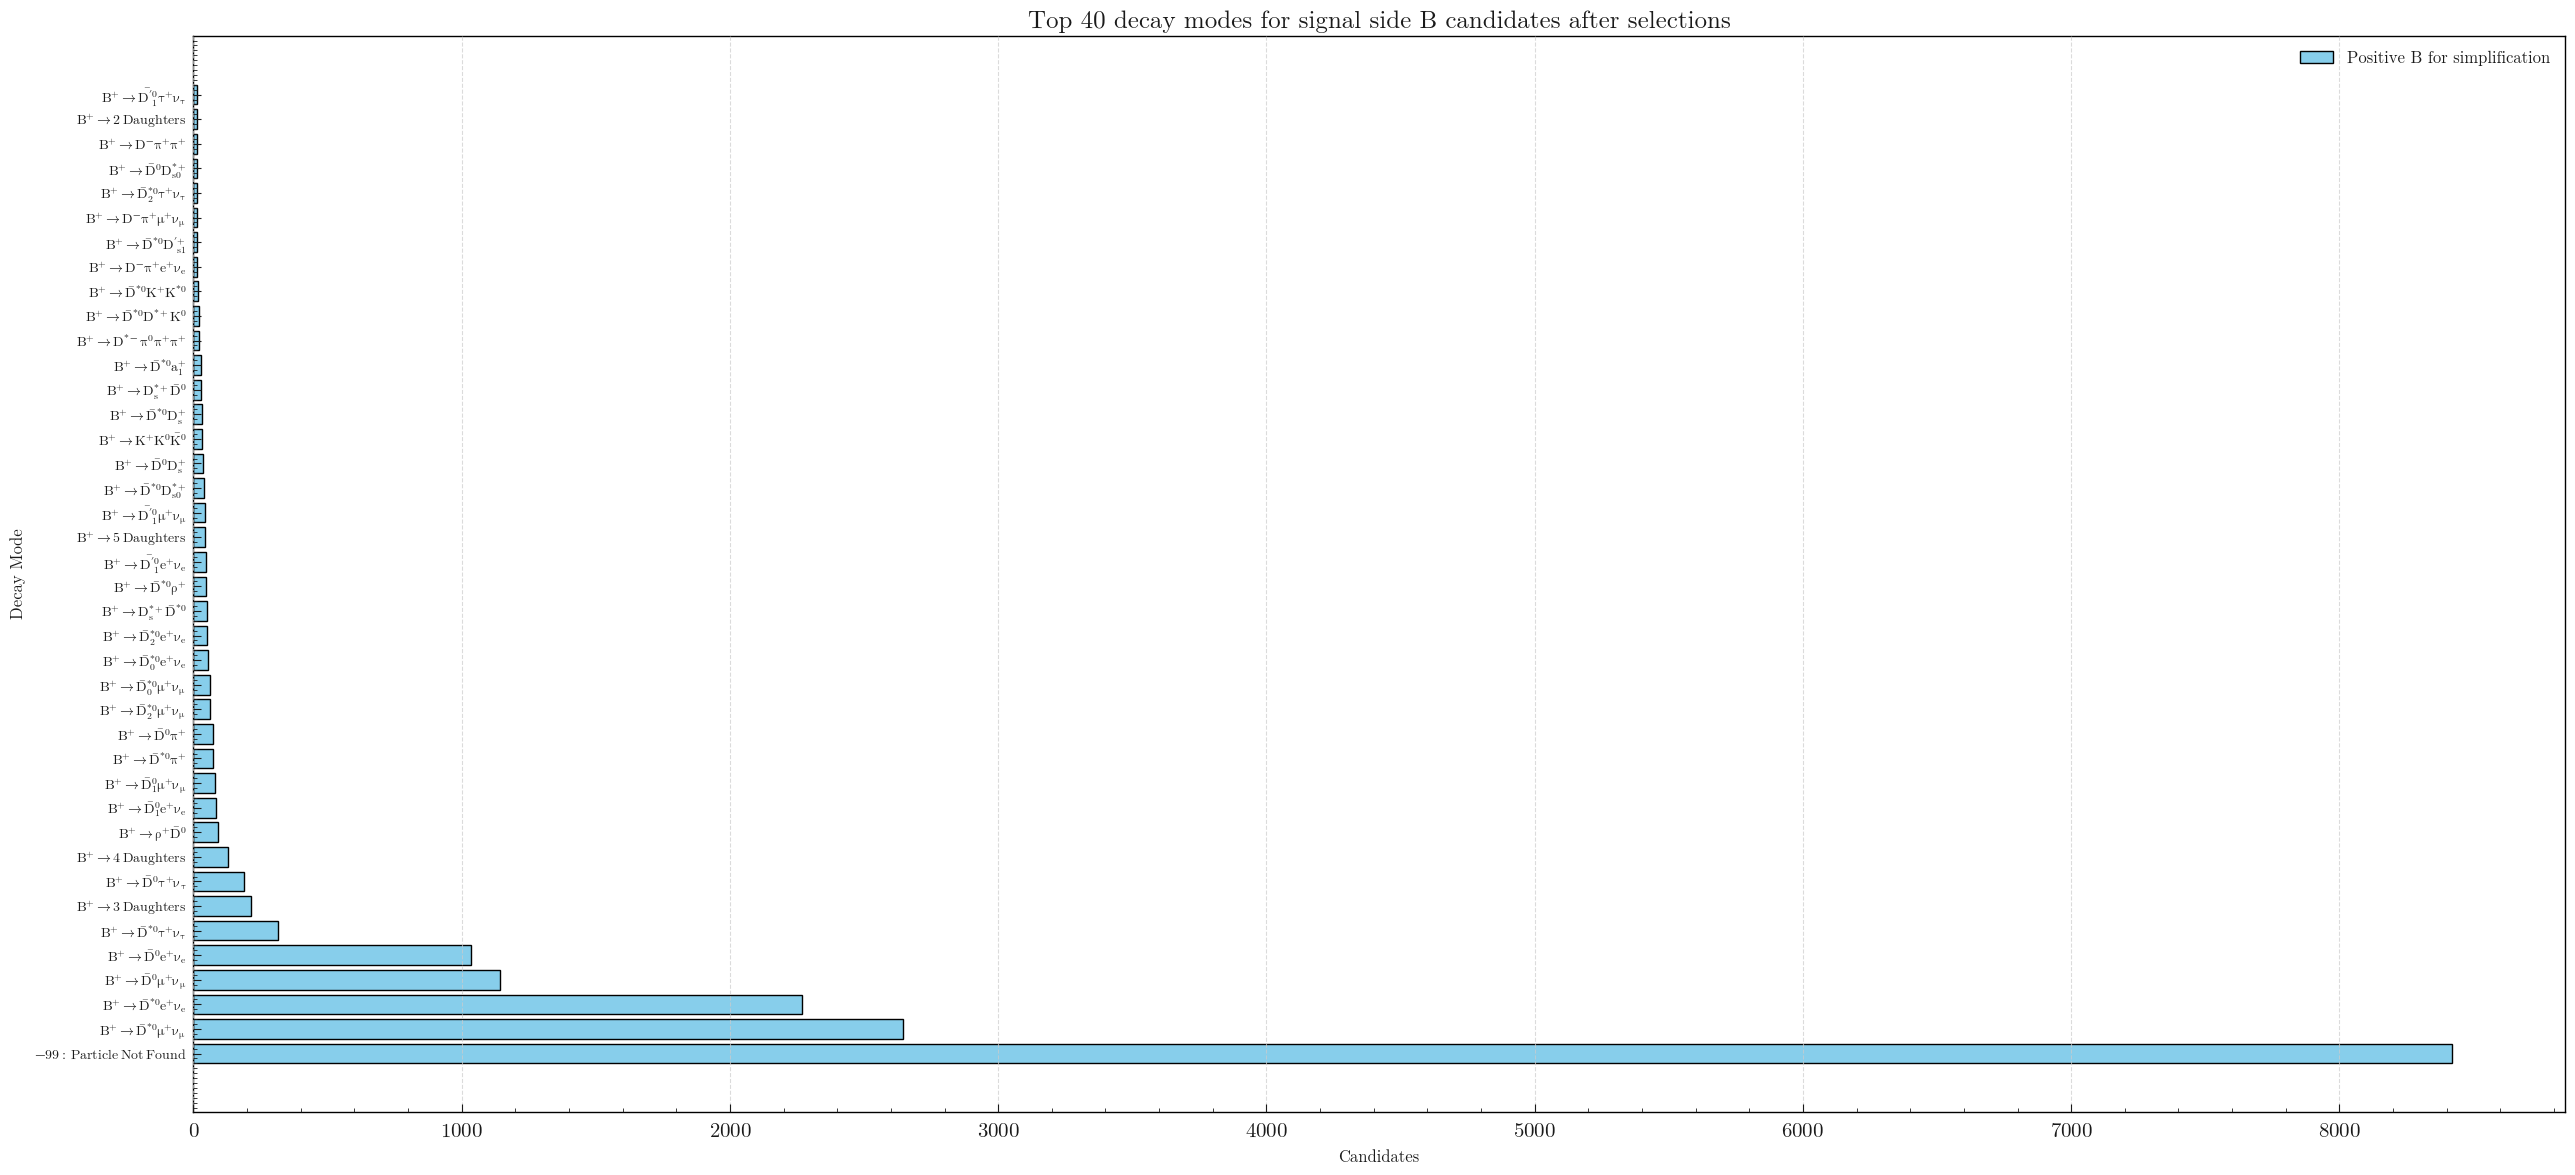

In [5]:
all_modes = get_mode_dicts()

def sel_ini(df):
    df_t = df.copy()
    df_t = df_t.query('(K0S_InvM > 0.489) & (K0S_InvM < 0.5056) & (BSL_BchiProb > 1e-8) & (nROE_Ch == 0) & (Eextra_ROE < 0.93) & (Eextra_ROE_loose < 1.84)')
    df_t = df_t.query('(BSL_cosBY > -3) & (BSL_cosBY < 1.1) & (M_ROE_loose < 6.58) & (M_ROE < 4) & (K0S_flightDistance > 0.14) & (K0S_flightDistanceErr < 0.5) & (R2 < 0.73)')
    df_t = df_t.query('(trk_dz > -1.8) & (trk_dz < 1.8) & (K0S_dz > -6.8) & (K0S_dz < 3.4) & (K0S_dr < 9.3) & (trkK0S_ECM < 20)')
    df_t = df_t.query('(K0S_pCM < 2.5) & (trk_pCM < 2.5) & (eSL_pCM < 2.5) & (nROE_KL) < 12')
    return df_t
    
sel_ini0 = sel_ini(df_asim)

modes = 40

top_twent = sel_ini0['signal'].value_counts().head(modes)
cols = top_twent.index
vals = top_twent.values
col2 = [f"${all_modes['Bplus'][abs(col)]}$" for col in cols]
#So the general way is just f"${dict[mother][abs(mode_id)]$" 

"""In general, you just access it by doing my_dict['Bplus etc'][mode] and loop through all modes you're interested in, getting them as I did. (Make sure to absolute value the modes)"""
#example below
fig4 = plt.figure(figsize=(26, 12))
plt.barh(range(len(vals)), vals, color='skyblue', edgecolor='black', label='Positive B for simplification')
plt.xlabel("Candidates", fontsize=12)
plt.ylabel("Decay Mode", fontsize=12)
plt.title(f'Top {modes} decay modes for signal side B candidates after selections')
plt.yticks(range(len(col2)), col2, fontsize=10)
plt.tight_layout()
fig4.savefig("show4.pdf")

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()